In [667]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math  # for rounding up values
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime  # for strptime
import datetime
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from seaborn import heatmap
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_COST_1.csv', converters={'PARTY_ID': str})
df['ETD_POL_D'] = pd.to_datetime(df['ETD_POL_D'])
df.head(10)
df.info()
print(f'Dataset size: {df.shape}')


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE
0,850.0,010019363,FRLEH,2020-08-24,40,HC NOR
1,110.0,01005728,CNYTN,2020-08-25,20,GP
2,1850.0,01001591,MTMAR,2020-08-25,40,HC
3,1041.0,010019364,FRFOS,2020-08-25,40,HC
4,200.0,01008827,CNNGB,2020-08-22,40,HC
5,1050.0,010021385,UYMVD,2020-08-24,40,HC NOR
6,1050.0,010021385,UYMVD,2020-08-24,40,HC NOR
7,2120.0,010008035,ILASH,2020-08-25,40,HC
8,2720.0,010026822,CAVAN,2020-08-22,20,GP
9,650.0,010003639,MMAWT,2020-08-22,40,GP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108465 entries, 0 to 108464
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   COST_RATE  108465 non-null  float64       
 1   PARTY_ID   108465 non-null  object        
 2   POD_ID     108465 non-null  object        
 3   ETD_POL_D  108464 non-null  datetime64[ns]
 4   CNTR_SIZE  108465 non-null  int64         
 5   CNTR_TYPE  108465 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 5.0+ MB
Dataset size: (108465, 6)


In [668]:
sel_port = "AEDXB"
sel_cntr_size = 40
sel_cntr_type = "HC"
sel_party = "01002788"

In [669]:
# Getting pod id "AEDXB"
sel_port_df = df[df["POD_ID"] == sel_port]

# Getting container size 40 data
cntr_size_grp = sel_port_df.groupby(sel_port_df['CNTR_SIZE'])
cntr_size_40 = cntr_size_grp.get_group(sel_cntr_size)

# Getting container type HC data
cntr_type_grp = cntr_size_40.groupby(cntr_size_40['CNTR_TYPE'])
cntr_hc = cntr_type_grp.get_group(sel_cntr_type)

# Getting party id: 01002788 data
sel_cntr = cntr_hc.groupby(cntr_size_40['PARTY_ID'])
cntr_df = sel_cntr.get_group(sel_party)

cntr_df = cntr_df.sort_values(by='ETD_POL_D', ascending=True)

cntr_df.head(5)
cntr_df.tail(5)
print(len(cntr_df))
cntr_df.info()

,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE
30509,1500.0,01002788,AEDXB,2005-07-24,40,HC
65839,700.0,01002788,AEDXB,2009-03-07,40,HC
65840,700.0,01002788,AEDXB,2009-03-07,40,HC
67534,850.0,01002788,AEDXB,2009-03-10,40,HC
67009,850.0,01002788,AEDXB,2009-04-09,40,HC


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE
108275,150.0,01002788,AEDXB,2022-10-19,40,HC
108276,150.0,01002788,AEDXB,2022-10-19,40,HC
104921,6800.0,01002788,AEDXB,2022-11-01,40,HC
106150,5100.0,01002788,AEDXB,2022-12-04,40,HC
17290,3600.0,01002788,AEDXB,2022-12-08,40,HC


1032
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 30509 to 17290
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   COST_RATE  1032 non-null   float64       
 1   PARTY_ID   1032 non-null   object        
 2   POD_ID     1032 non-null   object        
 3   ETD_POL_D  1032 non-null   datetime64[ns]
 4   CNTR_SIZE  1032 non-null   int64         
 5   CNTR_TYPE  1032 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 56.4+ KB


In [670]:
# Removing 2005 as it is an outlier
cntr_df = cntr_df[cntr_df['ETD_POL_D'].dt.year != 2005]
cntr_df = cntr_df.dropna().reset_index(drop=True)
cntr_df = cntr_df[cntr_df['COST_RATE'] != 'NAT']
cntr_df = cntr_df.reset_index(drop=True)

cntr_df.head(5)
cntr_df.tail(5)
cntr_df.info()

,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE
0,700.0,01002788,AEDXB,2009-03-07,40,HC
1,700.0,01002788,AEDXB,2009-03-07,40,HC
2,850.0,01002788,AEDXB,2009-03-10,40,HC
3,850.0,01002788,AEDXB,2009-04-09,40,HC
4,850.0,01002788,AEDXB,2009-04-09,40,HC


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE
1026,150.0,01002788,AEDXB,2022-10-19,40,HC
1027,150.0,01002788,AEDXB,2022-10-19,40,HC
1028,6800.0,01002788,AEDXB,2022-11-01,40,HC
1029,5100.0,01002788,AEDXB,2022-12-04,40,HC
1030,3600.0,01002788,AEDXB,2022-12-08,40,HC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   COST_RATE  1031 non-null   float64       
 1   PARTY_ID   1031 non-null   object        
 2   POD_ID     1031 non-null   object        
 3   ETD_POL_D  1031 non-null   datetime64[ns]
 4   CNTR_SIZE  1031 non-null   int64         
 5   CNTR_TYPE  1031 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 48.5+ KB


In [671]:
column = ['ETD_POL_D','COST_RATE']
sel_cntr_df = pd.DataFrame(cntr_df[column])

sel_cntr_df.head(5)
sel_cntr_df.tail(5)

,ETD_POL_D,COST_RATE
0,2009-03-07,700.0
1,2009-03-07,700.0
2,2009-03-10,850.0
3,2009-04-09,850.0
4,2009-04-09,850.0


,ETD_POL_D,COST_RATE
1026,2022-10-19,150.0
1027,2022-10-19,150.0
1028,2022-11-01,6800.0
1029,2022-12-04,5100.0
1030,2022-12-08,3600.0


In [672]:
# Convert the date column to datetime and extract the year and month
sel_cntr_df['year_month'] = sel_cntr_df['ETD_POL_D'].dt.strftime('%Y-%m')

# Group the data by year and month and calculate the average cost rate
sel_cntr_df = sel_cntr_df.groupby('year_month').mean()
sel_cntr_df = sel_cntr_df.reset_index()

C:\Users\it1\AppData\Local\Temp\ipykernel_34196\3354391306.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sel_cntr_df = sel_cntr_df.groupby('year_month').mean()


In [673]:
sel_cntr_df['year_month']=pd.to_datetime(sel_cntr_df['year_month'])
sel_cntr_df.head()
sel_cntr_df.tail()
sel_cntr_df.info()

,year_month,COST_RATE
0,2009-03-01,750.0
1,2009-04-01,850.0
2,2009-05-01,670.0
3,2009-06-01,700.0
4,2009-07-01,850.0


,year_month,COST_RATE
152,2022-08-01,4816.000000
153,2022-09-01,5433.333333
154,2022-10-01,150.000000
155,2022-11-01,6800.000000
156,2022-12-01,4350.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year_month  157 non-null    datetime64[ns]
 1   COST_RATE   157 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [674]:
# sel_cntr_df['COST_RATE'] = sel_cntr_df['COST_RATE'].round(2)
sel_cntr_df['COST_RATE'] = sel_cntr_df['COST_RATE'].apply(lambda x: round(x, 2))
sel_cntr_df.head()
sel_cntr_df.tail()
sel_cntr_df.info()

,year_month,COST_RATE
0,2009-03-01,750.0
1,2009-04-01,850.0
2,2009-05-01,670.0
3,2009-06-01,700.0
4,2009-07-01,850.0


,year_month,COST_RATE
152,2022-08-01,4816.00
153,2022-09-01,5433.33
154,2022-10-01,150.00
155,2022-11-01,6800.00
156,2022-12-01,4350.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year_month  157 non-null    datetime64[ns]
 1   COST_RATE   157 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [675]:
sel_cntr_df.set_index('year_month',inplace=True)
sel_cntr_df.head()

,COST_RATE
year_month,
2009-03-01,750.0
2009-04-01,850.0
2009-05-01,670.0
2009-06-01,700.0
2009-07-01,850.0


<AxesSubplot: xlabel='year_month'>

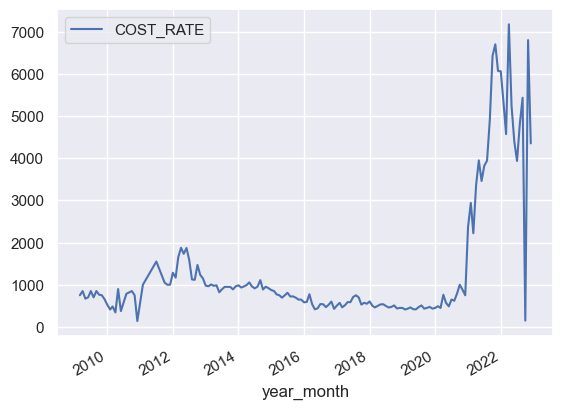

In [676]:
sel_cntr_df.plot()

In [677]:
# Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(sel_cntr_df['COST_RATE'])

In [678]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(cost_rate):
    result=adfuller(cost_rate)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [679]:
adfuller_test(sel_cntr_df['COST_RATE'])

ADF Test Statistic : -2.2447360007992785
p-value : 0.1904111547224283
#Lags Used : 7
Number of Observations Used : 149
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<p>As the model is already stationary, it is not needed to perform differencing.</p>
<p>Stationary time series means that the mean and variance are constant over time, which makes it easier to predict.</p>


In [680]:
sel_cntr_df['First Difference'] = sel_cntr_df['COST_RATE'] - sel_cntr_df['COST_RATE'].shift(1)

In [681]:
sel_cntr_df['COST_RATE'].shift(1)

year_month
2009-03-01        NaN
2009-04-01     750.00
2009-05-01     850.00
2009-06-01     670.00
2009-07-01     700.00
               ...   
2022-08-01    3933.75
2022-09-01    4816.00
2022-10-01    5433.33
2022-11-01     150.00
2022-12-01    6800.00
Name: COST_RATE, Length: 157, dtype: float64

In [682]:
sel_cntr_df['Seasonal First Difference']=sel_cntr_df['COST_RATE']-sel_cntr_df['COST_RATE'].shift(12)
sel_cntr_df.head(14)
sel_cntr_df.tail(20)

,COST_RATE,First Difference,Seasonal First Difference
year_month,,,
2009-03-01,750.00,NaN,NaN
2009-04-01,850.00,100.00,NaN
2009-05-01,670.00,-180.00,NaN
2009-06-01,700.00,30.00,NaN
2009-07-01,850.00,150.00,NaN
2009-08-01,700.00,-150.00,NaN
2009-09-01,850.00,150.00,NaN
2009-10-01,764.29,-85.71,NaN
2009-11-01,750.00,-14.29,NaN


,COST_RATE,First Difference,Seasonal First Difference
year_month,,,
2021-05-01,3947.92,585.42,3377.92
2021-06-01,3460.00,-487.92,2972.50
2021-07-01,3820.00,360.00,3170.00
2021-08-01,3942.86,122.86,3322.86
2021-09-01,4920.00,977.14,4126.25
2021-10-01,6425.00,1505.00,5425.00
2021-11-01,6700.00,275.00,5820.00
2021-12-01,6070.00,-630.00,5320.00
2022-01-01,6060.00,-10.00,3695.00


In [683]:
## Again test dickey fuller test
adfuller_test(sel_cntr_df['Seasonal First Difference'].dropna())

ADF Test Statistic : 0.4314670340335327
p-value : 0.9826343135941008
#Lags Used : 14
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot: xlabel='year_month'>

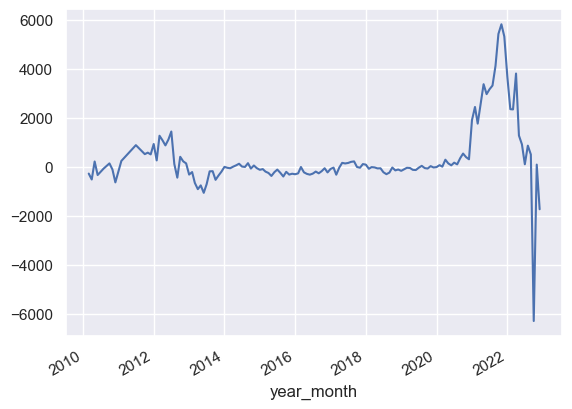

In [684]:
sel_cntr_df['Seasonal First Difference'].plot()

<h4>Auto Regressive Model</h4>

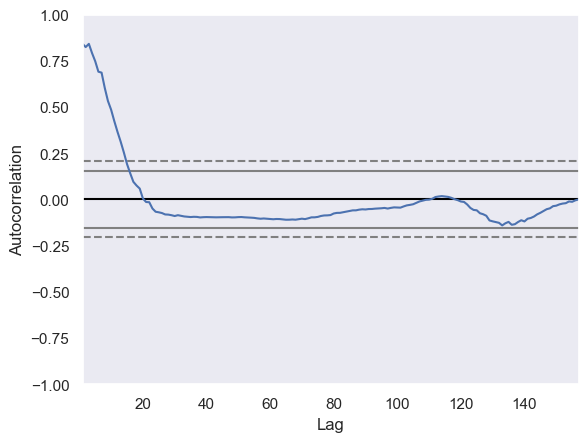

In [685]:
pd.plotting.autocorrelation_plot(sel_cntr_df['COST_RATE'])
plt.plot();

<h4> Thoughts on Autocorrelation and Partial Autocorrelation</h4>
<ol>
    <li>Identification of an MA model is often best done with the ACF rather than the PACF.</li>
        <ol>For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.</ol>
</ol>

c:\Users\it1\Documents\GitHub\CR-Analysis\cr_cost\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


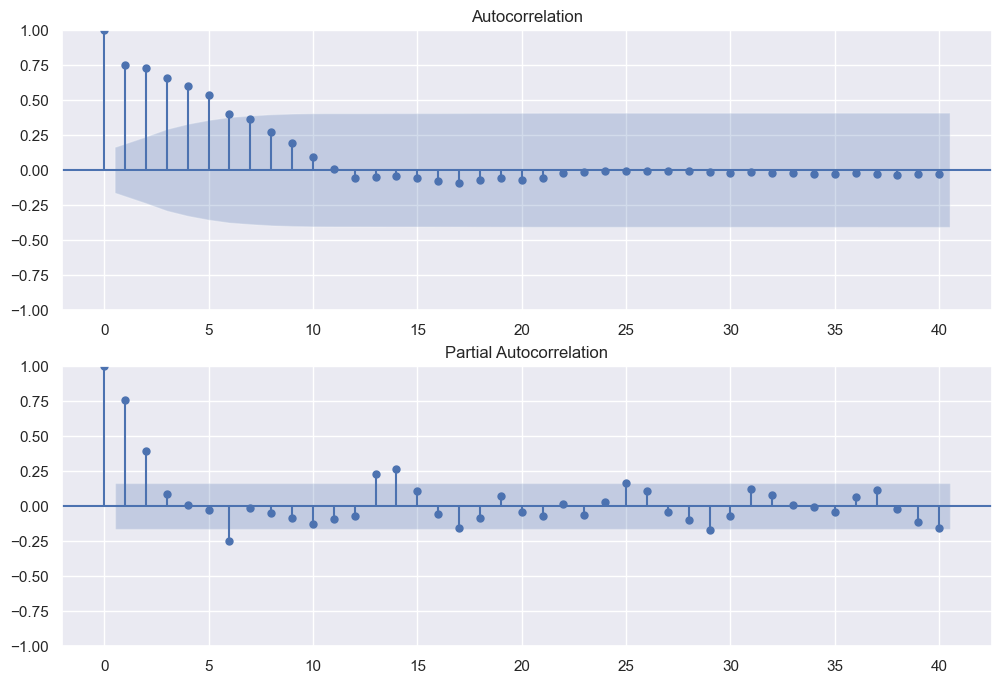

In [686]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(sel_cntr_df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(sel_cntr_df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [687]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(sel_cntr_df['COST_RATE'], order=(1,1,1))
model_fit = model.fit();
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              COST_RATE   No. Observations:                  157
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1231.717
Date:                Wed, 01 Feb 2023   AIC                           2469.435
Time:                        11:27:58   BIC                           2478.584
Sample:                             0   HQIC                          2473.151
                                - 157                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3276      0.086     -3.805      0.000      -0.496      -0.159
ma.L1         -0.4043      0.092     -4.377      0.000      -0.585      -0.223
sigma2      4.294e+05   1.63e+04     26.402      0.0

c:\Users\it1\Documents\GitHub\CR-Analysis\cr_cost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\it1\Documents\GitHub\CR-Analysis\cr_cost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\it1\Documents\GitHub\CR-Analysis\cr_cost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [688]:
from pandas import datetime
start_index = datetime(2022, 8, 8)
end_index = datetime(2022, 12, 8)

C:\Users\it1\AppData\Local\Temp\ipykernel_34196\1997754516.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<AxesSubplot: xlabel='year_month'>

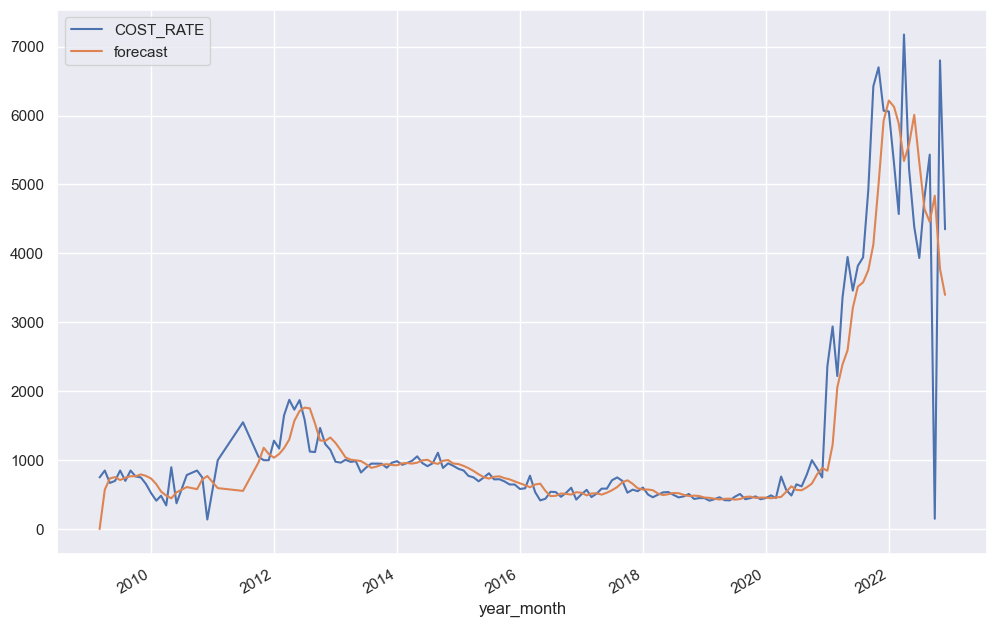

In [702]:
sel_cntr_df['forecast']=model_fit.predict(n_period=24)
sel_cntr_df[['COST_RATE','forecast']].plot(figsize=(12,8))

In [690]:
sel_cntr_df.head(10)
sel_cntr_df.tail(10)
sel_cntr_df.info()

,COST_RATE,First Difference,Seasonal First Difference,forecast
year_month,,,,
2009-03-01,750.00,NaN,NaN,NaN
2009-04-01,850.00,100.00,NaN,NaN
2009-05-01,670.00,-180.00,NaN,NaN
2009-06-01,700.00,30.00,NaN,NaN
2009-07-01,850.00,150.00,NaN,NaN
2009-08-01,700.00,-150.00,NaN,NaN
2009-09-01,850.00,150.00,NaN,NaN
2009-10-01,764.29,-85.71,NaN,NaN
2009-11-01,750.00,-14.29,NaN,NaN


,COST_RATE,First Difference,Seasonal First Difference,forecast
year_month,,,,
2022-03-01,4571.43,-728.57,2350.00,5883.370256
2022-04-01,7175.00,2603.57,3812.50,5340.625321
2022-05-01,5233.33,-1941.67,1285.41,5580.219633
2022-06-01,4385.71,-847.62,925.71,6009.778056
2022-07-01,3933.75,-451.96,113.75,5320.120176
2022-08-01,4816.00,882.25,873.14,4642.410305
2022-09-01,5433.33,617.33,513.33,4456.742065
2022-10-01,150.00,-5283.33,-6275.00,4836.181405
2022-11-01,6800.00,6650.00,100.00,3775.921289


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2009-03-01 to 2022-12-01
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COST_RATE                  157 non-null    float64
 1   First Difference           156 non-null    float64
 2   Seasonal First Difference  145 non-null    float64
 3   forecast                   12 non-null     float64
dtypes: float64(4)
memory usage: 6.1 KB


In [711]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(sel_cntr_df['COST_RATE'],order=(4, 1, 5),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\it1\Documents\GitHub\CR-Analysis\cr_cost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\it1\Documents\GitHub\CR-Analysis\cr_cost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\it1\Documents\GitHub\CR-Analysis\cr_cost\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: xlabel='year_month'>

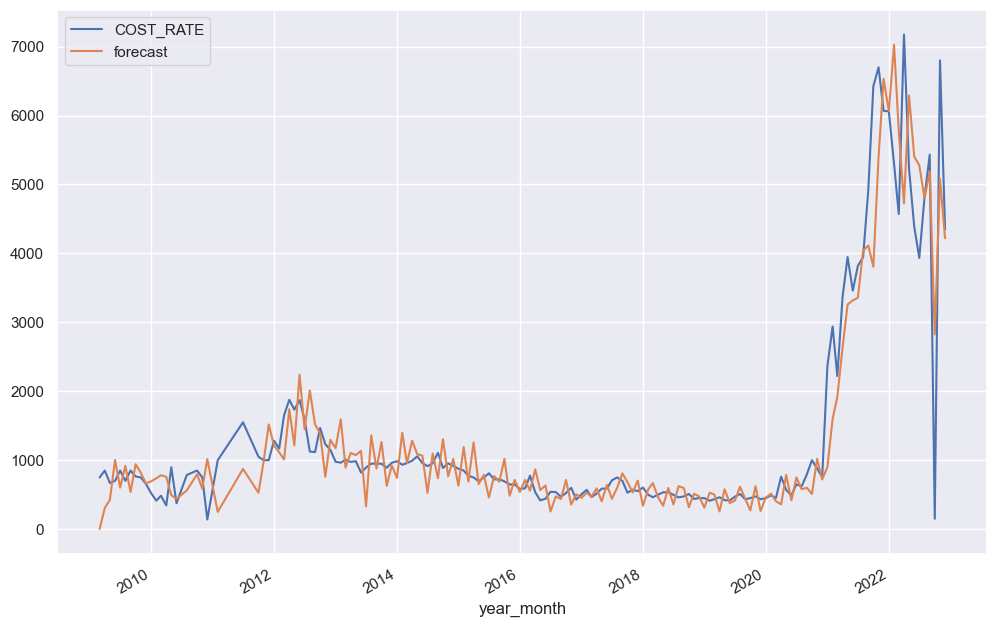

In [712]:
sel_cntr_df['forecast']=results.predict(n_period=24)
sel_cntr_df[['COST_RATE','forecast']].plot(figsize=(12,8))

In [713]:
from pandas.tseries.offsets import DateOffset
future_dates=[sel_cntr_df.index[-1.]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=sel_cntr_df.columns)
future_datest_df.tail()

C:\Users\it1\AppData\Local\Temp\ipykernel_34196\176371895.py:2: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  future_dates=[sel_cntr_df.index[-1.]+ DateOffset(months=x)for x in range(0,24)]


,COST_RATE,First Difference,Seasonal First Difference,forecast
2024-07-01,NaN,NaN,NaN,NaN
2024-08-01,NaN,NaN,NaN,NaN
2024-09-01,NaN,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN,NaN
2024-11-01,NaN,NaN,NaN,NaN


In [714]:
future_df=pd.concat([sel_cntr_df,future_datest_df])
future_df.tail(25)

,COST_RATE,First Difference,Seasonal First Difference,forecast
2022-11-01,6800.0,6650.0,100.0,5081.254413
2022-12-01,4350.0,-2450.0,-1720.0,4220.332082
2023-01-01,NaN,NaN,NaN,NaN
2023-02-01,NaN,NaN,NaN,NaN
2023-03-01,NaN,NaN,NaN,NaN
2023-04-01,NaN,NaN,NaN,NaN
2023-05-01,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN
2023-07-01,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,NaN


In [715]:
future_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2009-03-01 to 2024-11-01
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COST_RATE                  157 non-null    float64
 1   First Difference           156 non-null    float64
 2   Seasonal First Difference  145 non-null    float64
 3   forecast                   157 non-null    float64
dtypes: float64(4)
memory usage: 7.0 KB


In [695]:
from pandas import datetime
start_index = datetime(2022, 12, 1)
end_index = datetime(2024, 11, 1)

C:\Users\it1\AppData\Local\Temp\ipykernel_34196\2564390941.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [726]:
# future_df=pd.concat([sel_cntr_df,future_datest_df])

index_of_fc = pd.date_range(sel_cntr_df.index[-1], periods = 24, freq='MS')
future_df['forecast'] = results.predict(start=sel_cntr_df.index[-1],end=sel_cntr_df.index[:0]) 
future_df.tail(10) 
future_df[['COST_RATE', 'forecast']].plot(figsize=(15, 8)) 

TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`